# Initial plots for node degrees and frequencies

In [1]:
cd ~/thesis

/home/jovyan/thesis


/home/jovyan/venvs/my_environment/lib/python3.10/site-packages/IPython/core/magics/osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/home/jovyan/venvs/my_environment/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Import libraries

In [2]:
import os

import pandas as pd
import networkx as nx

from main_utils import *
from plot_utils import *

/tmp/ipykernel_175/1348101601.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## BlogCatalog

In [3]:
blog_dir = '/home/jovyan/thesis/datasets/blog_catalog/data/'

# blog_dir = 'datasets/blog_catalog/data/'

G = nx.read_edgelist(blog_dir+'edges.csv', delimiter=',')
G.name = 'blog_catalog'

# Groups mapping
group_df = pd.read_csv(blog_dir+'group-edges.csv', delimiter=',')
group_df.columns = ['node', 'group']

walks_filenames = os.listdir('walks')

walks_filename = 'walks_r200_l30_p1_q1_ns_0.75.pkl' # walks_filenames[0]
node_freq_dict, visit_counts, cumulative_freq_prob = freq_gen(walks_filename=walks_filename)

# output_list = [visit_counts, cumulative_freq_prob]
# param_dict = param_dict_gen(params, output_list)

degrees, cumulative_deg_prob = degrees_distribution_gen(G)

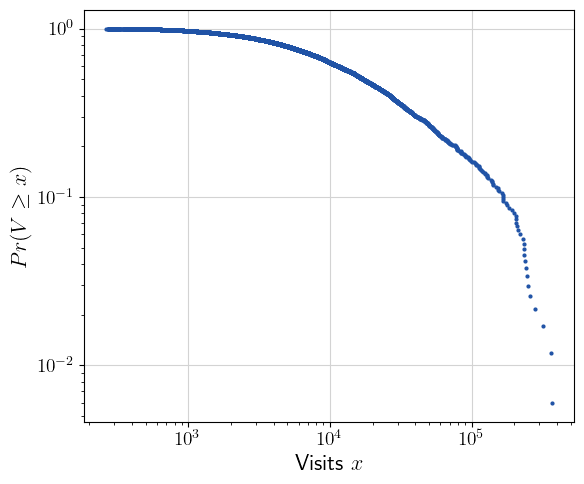

In [7]:
# Plot
fig = freq_plot(visit_counts, cumulative_freq_prob)

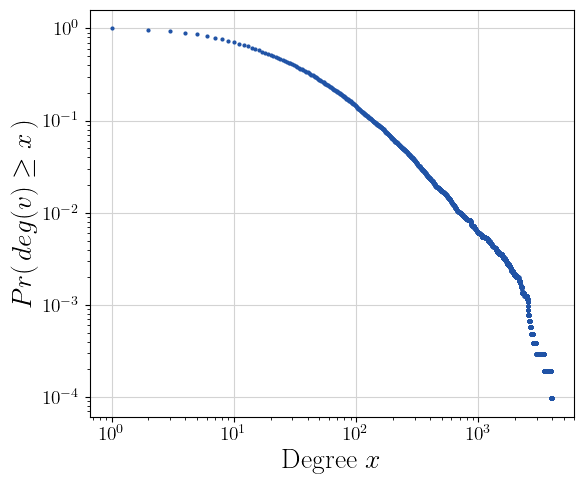

In [9]:
# Plot
fig = degree_plot(cumulative_deg_prob)

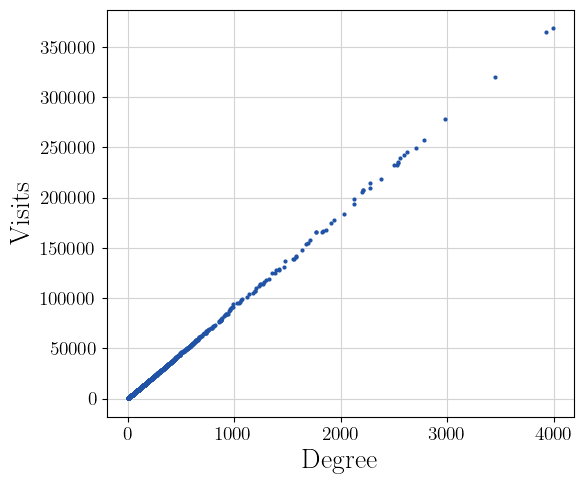

In [11]:
# Plot
fig = degree_freq_plot(G, degrees, node_freq_dict)

In [11]:
# plt.rcParams.values()

## Stochastic Block Model

In [13]:
sizes = [100, 100, 250]
probs = [[0.25, 0.05, 0.02], [0.05, 0.35, 0.07], [0.02, 0.07, 0.40]]

G = nx.stochastic_block_model(sizes, probs, seed=0)

params = [64, 10, 80, 0.25, 4]

node2vec, model = model_gen(G, params)

walks = node2vec.walks

node_freq_dict, visit_counts, cumulative_freq_prob = freq_gen(walks=walks)

# output_list = [visit_counts, cumulative_freq_prob]
# param_dict = param_dict_gen(params, output_list)

degrees, cumulative_deg_prob = degrees_distribution_gen(G)

Computing transition probabilities...
Random walks in progress...


  0%|          | 0/64 [00:00<?, ?it/s]

Fitting model...
Model generated - (|V| = 450 , |E| = 18307)


## Grid Search through $p, q$ and other parameters

  0%|          | 0/5 [00:00<?, ?it/s]

Computing transition probabilities...
Random walks in progress...


  0%|          | 0/8 [00:00<?, ?it/s]

 20%|██        | 1/5 [00:20<01:23, 20.80s/it]

Computing transition probabilities...
Random walks in progress...


  0%|          | 0/8 [00:00<?, ?it/s]

 40%|████      | 2/5 [00:39<00:58, 19.66s/it]

Computing transition probabilities...
Random walks in progress...


  0%|          | 0/8 [00:00<?, ?it/s]

 60%|██████    | 3/5 [00:58<00:38, 19.17s/it]

Computing transition probabilities...
Random walks in progress...


  0%|          | 0/8 [00:00<?, ?it/s]

 80%|████████  | 4/5 [01:16<00:18, 18.96s/it]

Computing transition probabilities...
Random walks in progress...


  0%|          | 0/8 [00:00<?, ?it/s]

100%|██████████| 5/5 [01:35<00:00, 19.12s/it]


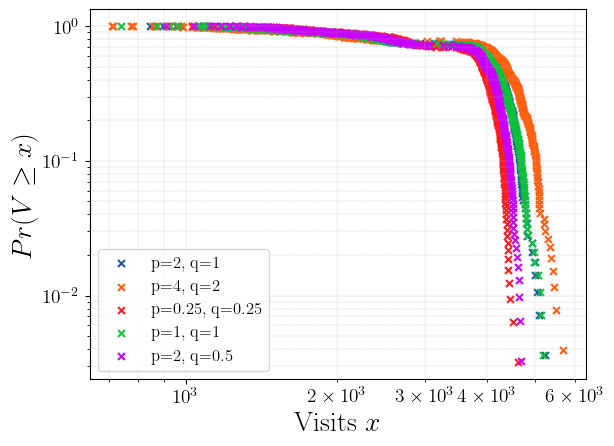

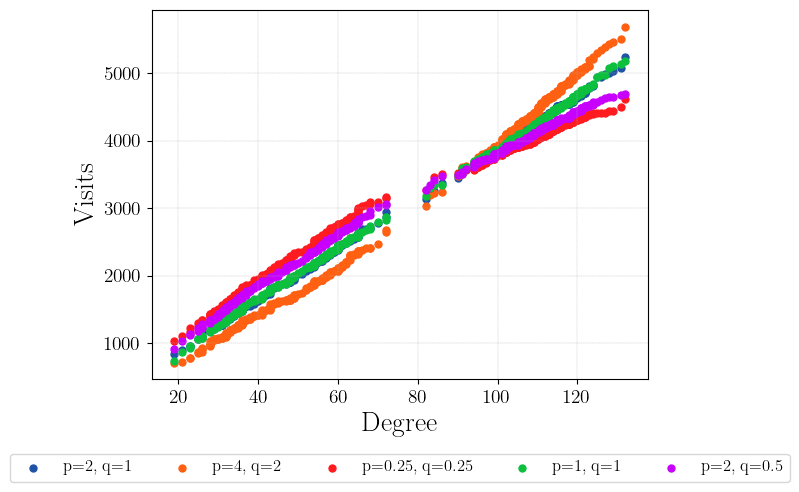

In [15]:
params_list = [(128, 40, 80, 2, 1),
               (128, 40, 80, 4, 2),
               (128, 40, 80, 0.25, 0.25),
               (128, 40, 80, 1, 1),
               (128, 40, 80, 2, 0.5)]

# Plot
params_grid_search(G, params_list)

In [ ]:
params_list = [[64, 10, 80, 1, 1],
              [64, 10, 80, 0.25, 0.25],
              [64, 10, 80, 0.25, 0.5],
              [64, 10, 80, 0.5, 0.5],
              [64, 10, 80, 0.5, 0.25]
            ]
